Alyssa P. Hacker owns a pet robotic snail with an FSM brain. The snail crawls from left to right along a paper tape containing a sequence of 1's and 0's. On each clock cycle, the snail crawls to the next bit. The snail smiles when the last two bits that it has crawled over are 01.

Design the FSM to compute when the snail should smile.

[__H & H Section 3.4.3__](https://dl.acm.org/doi/pdf/10.5555/2815529)

In [1]:
import os, sys
from pathlib import Path
PARENT_DIR = Path(os.getcwd()).resolve().parent
sys.path += [str(PARENT_DIR.joinpath('SciPyFST'))]
from SciPyFST import SciPyFST as FST
import graphviz, wavedrom
from IPython.display import display, Markdown

Create Moore FST

In [2]:
states = [0,1,2]
initState = 0
inAlphabet = [0,1]
outAlphabet = [0,1]
# transitionFunction [ [State, inAlphabet, nextState], ...]
transitionFunction = [ [0,0,1], [0,1,0], [1,0,1], [1,1,2], [2,0,1], [2,1,0] ]
# outputFunction Moore [ [State, outAlphabet], ...]
outputFunctionMoore = [ [0,0], [1,0], [2,1] ]
fstMoore = FST(states, initState, inAlphabet, outAlphabet, transitionFunction, outputFunctionMoore)
# short form
fstMoore2 = FST([], initState, [], [], transitionFunction, outputFunctionMoore)

Visualise FST

| Input \ State | 0 / 0 | 1 / 0 | 2 / 1 |
|:---:|:---:|:---:|:---:|
| 0 | 1 | 1 | 1 |
| 1 | 0 | 2 | 0 |


| Input \ State | 0 / 0 | 1 / 0 | 2 / 1 |
|:---:|:---:|:---:|:---:|
| 0 | 1 | 1 | 1 |
| 1 | 0 | 2 | 0 |


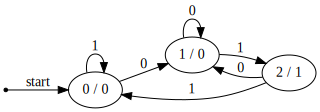

In [3]:
display(Markdown(fstMoore.toMdTable()))
display(Markdown(fstMoore2.toMdTable()))
graphviz.Source(fstMoore.toDot())

Play FST

In [4]:
inSignals = [0,1,0,0,1,1,0,1,1,1,0,1,0,1,0,1,0,1]
outSignals, outStates = fstMoore.playFST(inSignals)
print("             fstMoore.playFST(inSignals)")
print(" inSignals - " + str(inSignals))
print("    States - " + str(outStates))
print("outSignals - " + str(outSignals))
outSignals, outStates = fstMoore2.playFST(inSignals)
print("             fstMoore2.playFST(inSignals)")
print(" inSignals - " + str(inSignals))
print("    States - " + str(outStates))
print("outSignals - " + str(outSignals))

             fstMoore.playFST(inSignals)
 inSignals - [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
    States - [0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1]
outSignals - [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]
             fstMoore2.playFST(inSignals)
 inSignals - [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
    States - [0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1]
outSignals - [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]


             fstMooreUK.playFST(inSignals)
In ['Нуль', 'Один', 'Нуль', 'Нуль', 'Один', 'Один', 'Нуль', 'Один', 'Один', 'Один', 'Нуль', 'Один', 'Нуль']
Stt['Пчтк', 'Де І', 'Посм', 'Де І', 'Де І', 'Посм', 'Пчтк', 'Де І', 'Посм', 'Пчтк', 'Пчтк', 'Де І', 'Посм']
Out['->>-', '->>-', ';)))', '->>-', '->>-', ';)))', '->>-', '->>-', ';)))', '->>-', '->>-', '->>-', ';)))']


| Input \ State | Де І / ->>- | Посм / ;))) | Пчтк / ->>- |
|:---:|:---:|:---:|:---:|
| Нуль | Де І | Де І | Де І |
| Один | Посм | Пчтк | Пчтк |


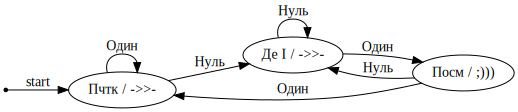

In [5]:
tranFunc = [ ["Пчтк","Нуль","Де І"], ["Пчтк","Один","Пчтк"],\
             ["Де І","Нуль","Де І"], ["Де І","Один","Посм"],\
             ["Посм","Нуль","Де І"], ["Посм","Один","Пчтк"] ]
outputFunc = [ ["Пчтк","->>-"], ["Де І","->>-"], ["Посм",";)))"] ]
fstMooreUK = FST([], "Пчтк", [], [], tranFunc, outputFunc)
inSignals = ["Нуль","Один","Нуль","Нуль","Один","Один","Нуль","Один","Один","Один", "Нуль","Один","Нуль"]
outSignals, outStates = fstMooreUK.playFST(inSignals)
print("             fstMooreUK.playFST(inSignals)")
print("In " + str(inSignals))
print("Stt" + str(outStates))
print("Out" + str(outSignals))
display(Markdown(fstMooreUK.toMdTable()))
graphviz.Source(fstMooreUK.toDot())